In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [73]:
df=pd.read_csv(r"C:\Users\ehina\OneDrive\Desktop\Py-DS-ML-Bootcamp-master\Imbalance DataSet\healthcare-dataset-stroke-data.csv")


In [74]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:

df=df.drop('id',axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [77]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [78]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['bmi'] = imp.fit_transform(df[['bmi']])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [83]:
pd.DataFrame(df['stroke'].value_counts()).reset_index()

,stroke,count
0,0,4861
1,1,249


([<matplotlib.patches.Wedge at 0x1fb6f6cb450>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'no stroke'),
  Text(1.087136143373357, -0.1677349271061446, 'stroke')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.13'),
  Text(0.592983350930922, -0.0914917784215334, '4.87')])

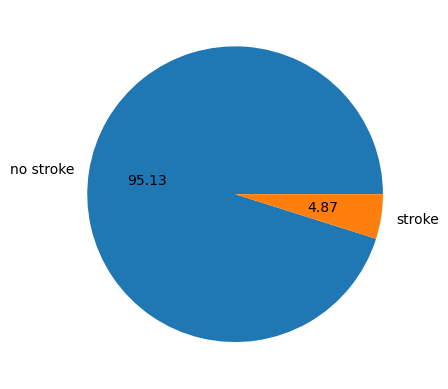

In [84]:
plt.pie(df['stroke'].value_counts(),autopct='%0.2f',labels=['no stroke','stroke'])

<Axes: xlabel='gender', ylabel='count'>

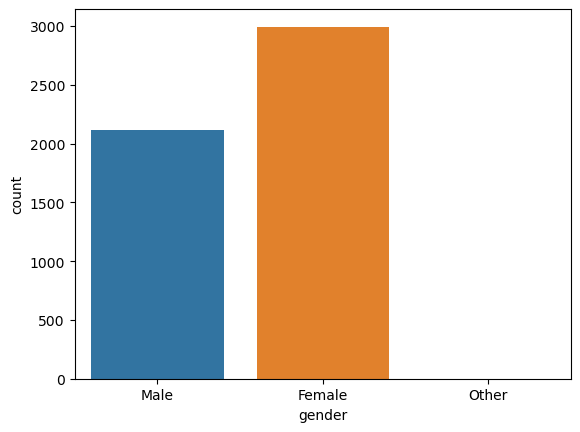

In [85]:
sns.countplot(data=df,x='gender')

In [86]:
df=df[df['gender']!='Other']


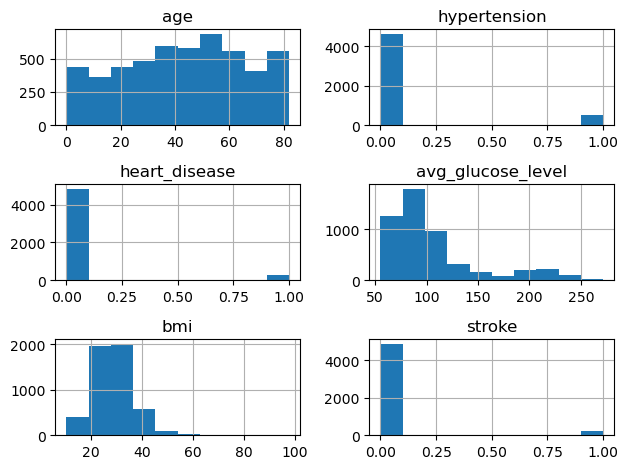

In [87]:
df.hist();
plt.tight_layout()

<Axes: xlabel='stroke', ylabel='bmi'>

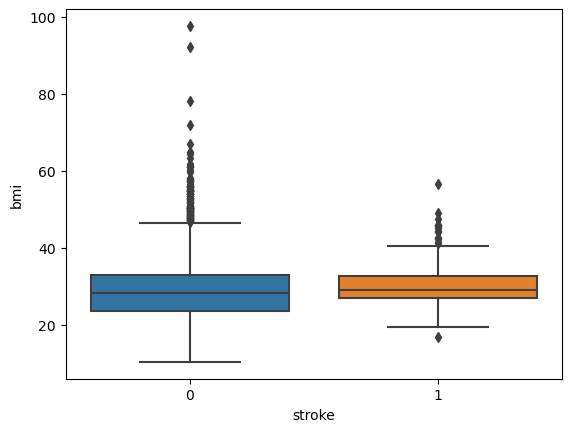

In [88]:
sns.boxplot(data=df,y='bmi',x='stroke')

<Axes: xlabel='stroke', ylabel='age'>

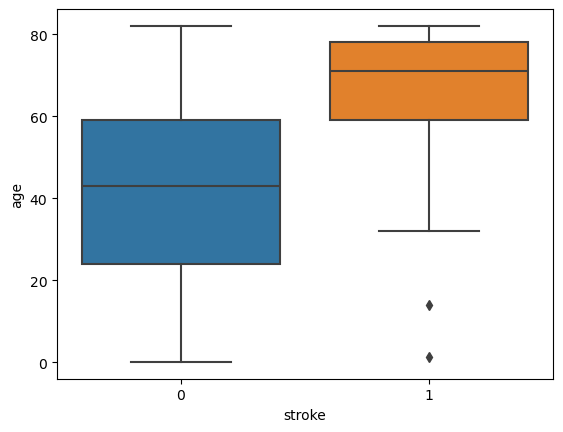

In [89]:
sns.boxplot(data=df,y='age',x='stroke')

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

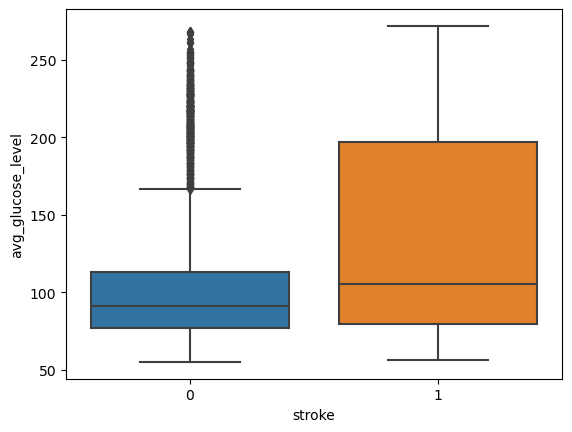

In [90]:

sns.boxplot(data=df,y='avg_glucose_level',x='stroke')


<Axes: xlabel='stroke', ylabel='count'>

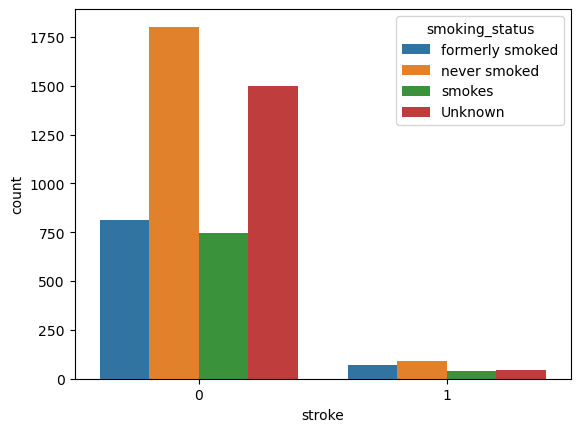

In [91]:
sns.countplot(data=df,x='stroke',hue='smoking_status')

In [92]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [95]:
cat_col=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status',]

df=pd.get_dummies(data=df,columns=cat_col,drop_first=True,dtype='int')

In [96]:
df.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male',
       'hypertension_1', 'heart_disease_1', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [97]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.600000,1,1,0,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.893237,1,0,0,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.500000,1,1,0,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.400000,1,0,0,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.000000,1,0,1,0,1,0,0,1,0,0,0,1,0


In [105]:
from imblearn.over_sampling import SMOTE

In [107]:
from sklearn.model_selection import train_test_split

In [111]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()

In [123]:
X_train[['age','bmi','avg_glucose_level']]=scaler.fit_transform(X_train[['age','bmi','avg_glucose_level']])

In [125]:
X_test[['age','bmi','avg_glucose_level']]=scaler.transform(X_test[['age','bmi','avg_glucose_level']])

In [129]:
smote=SMOTE(random_state=42)

In [131]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [132]:
print(X_train.shape)

(7776, 15)


In [133]:
y_train.value_counts()

stroke
0    3888
1    3888
Name: count, dtype: int64

In [134]:
from sklearn.linear_model import LogisticRegression


In [135]:
lr=LogisticRegression()

In [136]:
lr.fit(X_train,y_train)

LogisticRegression()

In [137]:
y_pred=lr.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix,recall_score,auc,roc_curve

In [160]:
accuracy_score(y_test,y_pred)

0.8816046966731899

In [161]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [162]:
rf=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()



In [163]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8864970645792564


array([[896,  76],
       [ 40,  10]], dtype=int64)

In [164]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8816046966731899
Precision: 0.9195900498315411
Recall: 0.8816046966731899
F1 Score: 0.8990651582301596
Confusion Matrix:
 [[888  84]
 [ 37  13]]


In [169]:
lgb.fit(X_train,y_train)
y_pred=lgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3888, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9070450097847358
Precision: 0.9202688007692605
Recall: 0.9070450097847358
F1 Score: 0.9133881254929659
Confusion Matrix:
 [[916  56]
 [ 39  11]]


In [176]:
y_pred_proba_lr=lr.predict_proba(X_test) [:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

y_pred_proba_rf=rf.predict_proba(X_test) [:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_proba_xgb=xgb.predict_proba(X_test) [:,1]
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


y_pred_proba_lgb=lgb.predict_proba(X_test) [:,1]
fpr_lgb, tpr_lgb, threshold_lgb = roc_curve(y_test, y_pred_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)



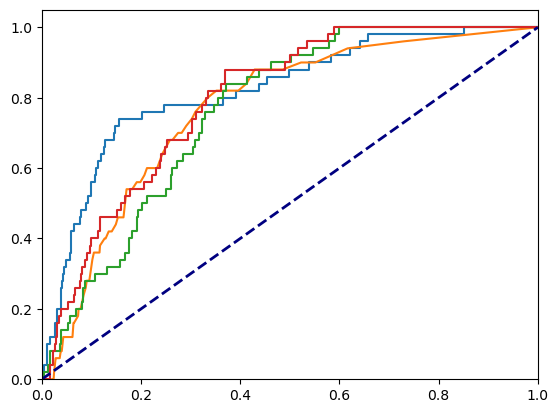

In [181]:
plt.figure()

plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_xgb, tpr_xgb)
plt.plot(fpr_lgb, tpr_lgb)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [183]:
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

In [184]:
roc_auc_lgb

0.7959876543209877

In [185]:
roc_auc_xgb

0.7633333333333333

In [186]:
roc_auc_lr

0.8212962962962963

In [187]:
roc_auc_rf

0.7683744855967078

In [198]:

best_threshold = None
best_tp = None
best_tn = None
best_fp = None
best_fn = None
max_net_benefit = float("-inf")

# Iterate through thresholds
for i in threshold_xgb:
    # Classify instances based on the threshold
    predicted_labels = (y_pred_proba_rf >= i).astype(int)

    # Calculate TP, TN, FP, FN
    tp = np.sum((predicted_labels == 1) & (y_test == 1))
    tn = np.sum((predicted_labels == 0) & (y_test == 0))
    fp = np.sum((predicted_labels == 1) & (y_test == 0))
    fn = np.sum((predicted_labels == 0) & (y_test == 1))

    net_benefit = (tp * 100) + (tn * 100) + (fp * -200) + (fn * -150)

    if net_benefit > max_net_benefit:
        max_net_benefit = net_benefit
        best_threshold = i
        best_tp = tp
        best_tn = tn
        best_fp = fp
        best_fn = fn
    

In [199]:
print(max_net_benefit)
print(best_threshold)
print(best_tp)
print(best_tn)
print(best_fp)
print(best_fn)

89700
inf
0
972
0
50


In [197]:
threshold_lgb

array([           inf, 9.31381305e-01, 7.66241078e-01, 7.53428369e-01,
       7.27790185e-01, 6.95436037e-01, 6.88376528e-01, 6.87036242e-01,
       6.79065435e-01, 6.69401070e-01, 6.50315881e-01, 6.47742630e-01,
       6.37156048e-01, 6.35966258e-01, 6.09219863e-01, 5.98810234e-01,
       5.91097236e-01, 5.87389836e-01, 5.33290497e-01, 5.27997080e-01,
       5.21110021e-01, 4.84291596e-01, 4.75565414e-01, 4.74562160e-01,
       4.71843475e-01, 4.38054004e-01, 4.36844853e-01, 4.31771724e-01,
       4.31728936e-01, 4.31030367e-01, 4.23968463e-01, 4.18374531e-01,
       4.17845422e-01, 4.12897031e-01, 4.11116289e-01, 3.96450579e-01,
       3.95925298e-01, 3.95047448e-01, 3.94320182e-01, 3.57493759e-01,
       3.57275364e-01, 3.41859208e-01, 3.39790770e-01, 3.36957720e-01,
       3.36086452e-01, 2.80634921e-01, 2.80387628e-01, 2.62847096e-01,
       2.60268063e-01, 2.50160922e-01, 2.50118225e-01, 2.40580047e-01,
       2.39410551e-01, 2.03524203e-01, 2.02983858e-01, 1.91690827e-01,
      